# PROJET D'OPTIMISATION - GRP 4 

## Récupération de données 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1

### Question 4

2.443137254901961
-2.843137254901961


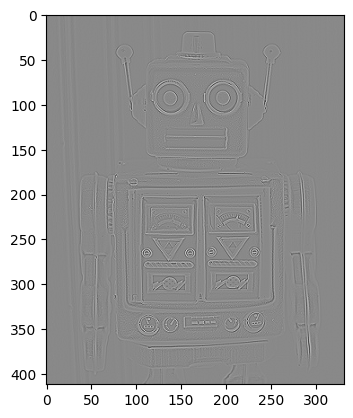

In [24]:
def grad(u):
    (n, m) = u.shape
    grad = np.zeros((n,m,2))
    grad[:n-1,:,0] = u[1:n, :] - u[0:n-1, :]
    grad[:,:m-1,1] = u[:, 1:m] - u[:, 0:m-1]
    return grad

def div(v):
    (n, m) = v.shape[:2]  # v is a vector of size n x m x 2
    v_x = v[:, :, 0]
    v_y = v[:, :, 1]
    div = np.zeros((n, m))
    
    div[0, :] += v_x[0, :]
    div[n-1, :] += -v_x[n-2, :]
    div[1:n-1, :] += (v_x[1:n-1, :] - v_x[0:n-2, :])
    
    div[:, 0] += v_y[:, 0]
    div[:, m-1] += -v_y[:, m-2]
    div[:, 1:m-1] += (v_y[:, 1:m-1] - v_y[:, 0:m-2])
    
    return div

u = plt.imread("./robot_no_noise.jpg")
u = u[:,:,0]/255

gradient = grad(u)
laplacian = div(gradient)  

print(np.max(laplacian))
print(np.min(laplacian))

laplacian = (laplacian - np.min(laplacian))/(np.max(laplacian) - np.min(laplacian))
(n, m) = laplacian.shape[:2]
gray_lap = np.zeros((n,m,3))
gray_lap[:,:,0] = laplacian
gray_lap[:,:,1] = laplacian
gray_lap[:,:,2] = laplacian
plt.imshow(gray_lap)

